# Network of Businesses based on Sequences

In [74]:
# Import necessary libraries
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import json
import collections
from itertools import combinations
import networkx as nx
from glob import glob
from networkx.algorithms import community
%matplotlib inline

## Edges: User's Sequenes of Services Visited

In [2]:
# Read review objects into a dataframe
Yelp_Reviews = pd.read_json('YelpDataset/review.json',lines=True)

In [3]:
# Check head
Yelp_Reviews.head(3)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,0W4lkclzZThpx3V65bVgig,0,2016-05-28,0,v0i_UHJMo_hPBq9bxWvW4w,5,"Love the staff, love the meat, love the place....",0,bv2nCi5Qv5vroFiqKGopiw
1,AEx2SYEUJmTxVVB18LlCwA,0,2016-05-28,0,vkVSCC7xljjrAI4UGfnKEQ,5,Super simple place but amazing nonetheless. It...,0,bv2nCi5Qv5vroFiqKGopiw
2,VR6GpWIda3SfvPC-lg9H3w,0,2016-05-28,0,n6QzIUObkYshz4dz2QRJTw,5,Small unassuming place that changes their menu...,0,bv2nCi5Qv5vroFiqKGopiw


In [54]:
# print(Yelp_Reviews)

In [5]:
list(Yelp_Reviews)

['business_id',
 'cool',
 'date',
 'funny',
 'review_id',
 'stars',
 'text',
 'useful',
 'user_id']

In [6]:
list_of_lists = []
def create_lists():
    temp_user = Yelp_Reviews['user_id'][0]
    temp_list = []
    for x in range(0, len(Yelp_Reviews) - 1):
        if (temp_user == Yelp_Reviews['user_id'][x]):
            # Append business id this current temp list
            temp_tuple = (Yelp_Reviews['business_id'][x], Yelp_Reviews['date'][x])
            temp_list.append(temp_tuple)
        elif (temp_user != Yelp_Reviews['user_id'][x]):
            # Append the current temp list to list of lists
            list_of_lists.append(temp_list)
            # Clear temp list
            temp_list = []
            # Add this value to the new temp list
            temp_tuple = (Yelp_Reviews['business_id'][x], Yelp_Reviews['date'][x])
            temp_list.append(temp_tuple)
            # Make the new user the temp user
            temp_user = Yelp_Reviews['user_id'][x]

In [7]:
create_lists()

In [59]:
# print(list_of_lists[:5])

In [56]:
print(list_of_lists[0])

[('0W4lkclzZThpx3V65bVgig', Timestamp('2016-05-28 00:00:00')), ('AEx2SYEUJmTxVVB18LlCwA', Timestamp('2016-05-28 00:00:00')), ('VR6GpWIda3SfvPC-lg9H3w', Timestamp('2016-05-28 00:00:00')), ('CKC0-MOWMqoeWf6s-szl8g', Timestamp('2016-05-28 00:00:00')), ('ACFtxLv8pGrrxMm6EgjreA', Timestamp('2016-05-28 00:00:00')), ('s2I_Ni76bjJNK9yG60iD-Q', Timestamp('2016-05-28 00:00:00'))]


In [17]:
# Arrange tuples in each sublist based on time value
time_arranged = []
time_temp_list = []
for x in range(0, len(list_of_lists) - 1):
    time_temp_list = sorted(list_of_lists[x], key=lambda x: x[1])
    time_arranged.append(time_temp_list)
    time_temp_list = []

In [58]:
[item[0] for item in time_arranged[1]]

['8QWPlVQ6D-OExqXoaD2Z1g']

In [31]:
# Put only the business info into a new list of lists
temp_var = []
id_only = []
for x in range(0, len(list_of_lists) - 1):
    temp_var = [item[0] for item in time_arranged[x]]
    id_only.append(temp_var)

In [32]:
# Check to see if function removed second item in tuples
print(id_only[0])

['0W4lkclzZThpx3V65bVgig', 'AEx2SYEUJmTxVVB18LlCwA', 'VR6GpWIda3SfvPC-lg9H3w', 'CKC0-MOWMqoeWf6s-szl8g', 'ACFtxLv8pGrrxMm6EgjreA', 's2I_Ni76bjJNK9yG60iD-Q']


In [47]:
# Take each pair and make it into a tuple
businesses_tuple = []

for y in range(0, len(id_only) - 1):
    for x in range(0, len(id_only[y]) - 1):
        businesses_tuple.append((tuple(id_only[y][x:(x+2)])))

In [50]:
print(businesses_tuple[:10])

[('0W4lkclzZThpx3V65bVgig', 'AEx2SYEUJmTxVVB18LlCwA'), ('AEx2SYEUJmTxVVB18LlCwA', 'VR6GpWIda3SfvPC-lg9H3w'), ('VR6GpWIda3SfvPC-lg9H3w', 'CKC0-MOWMqoeWf6s-szl8g'), ('CKC0-MOWMqoeWf6s-szl8g', 'ACFtxLv8pGrrxMm6EgjreA'), ('ACFtxLv8pGrrxMm6EgjreA', 's2I_Ni76bjJNK9yG60iD-Q'), ('0-yj2jtzLUHG2b7PpEHyog', '7Uti5EeAwm3drG14KVrE3Q'), ('7Uti5EeAwm3drG14KVrE3Q', 'SCklYa_jhihWAcfIn-_chg'), ('SCklYa_jhihWAcfIn-_chg', 'lRwpFFaFr3QQ5fGHkk3eXQ'), ('lRwpFFaFr3QQ5fGHkk3eXQ', 'Aov96CM4FZAXeZvKtsStdA'), ('Aov96CM4FZAXeZvKtsStdA', 'yaViddk9vxi-7p8DnjoClw')]


In [60]:
### Edges stored in " businesses_tuple "

## Vertices: Business ID's

In [61]:
# Read review objects into a dataframe
Yelp_Businesses = pd.read_json('YelpDataset/business.json',lines=True)

In [62]:
# Check head
Yelp_Businesses.head(3)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,"4855 E Warner Rd, Ste B9","{'AcceptsInsurance': True, 'ByAppointmentOnly'...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Friday': '7:30-17:00', 'Tuesday': '7:30-17:0...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ
1,3101 Washington Rd,"{'BusinessParking': {'garage': False, 'street'...",He-G7vWjzVUysIKrfNbPUQ,"[Hair Stylists, Hair Salons, Men's Hair Salons...",McMurray,"{'Monday': '9:00-20:00', 'Tuesday': '9:00-20:0...",1,40.291685,-80.104900,Stephen Szabo Salon,,15317,11,3.0,PA
2,"6025 N 27th Ave, Ste 1",{},KQPW8lFf1y5BT2MxiSZ3QA,"[Departments of Motor Vehicles, Public Service...",Phoenix,{},1,33.524903,-112.115310,Western Motor Vehicle,,85017,18,1.5,AZ


In [63]:
# Put business id's into a list to represent the vertices
Business_IDs = []
for x in range(0, (len(Yelp_Businesses) - 1)):
    Business_IDs.append(Yelp_Businesses['business_id'][x])

In [64]:
# Ensure the correct information has been appended
print(Business_IDs[:5])

['FYWN1wneV18bWNgQjJ2GNg', 'He-G7vWjzVUysIKrfNbPUQ', 'KQPW8lFf1y5BT2MxiSZ3QA', '8DShNS-LuFqpEWIp0HxijA', 'PfOCPjBrlQAnz__NXj9h_w']


In [65]:
# Check the number of nodes
print(len(Business_IDs))

174566


In [66]:
### Vertices or nodes stored in " Business_IDs "

## Creating the Network

In [67]:
G=nx.DiGraph()

In [68]:
# Add Nodes
G.add_nodes_from(Business_IDs)

In [69]:
# Add Edges
G.add_edges_from(businesses_tuple)
print('edges added')

edges added


In [70]:
G.number_of_nodes()

174567

In [71]:
G.number_of_edges()

3617982

In [72]:
# Remove Vertices That Don't Have Any Edge Connections
# REFERENCED: https://stackoverflow.com/questions/18261587/python-networkx-remove-nodes-and-edges-with-some-condition?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
remove = [node for node,degree in G.degree() if degree < 1]
print(len(G.nodes))
G.remove_nodes_from(remove)
print(len(G.nodes))

174567
173019


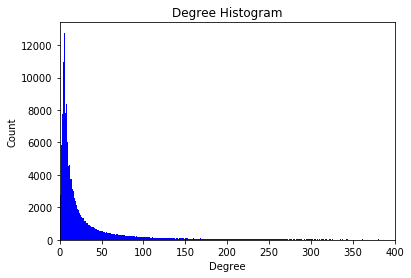

In [87]:
# Find the distribution of degrees

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=1, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")

ax.set_xlim(0, 400)

plt.savefig("images/Net1.png")
plt.show()